In [1]:
# perform necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

In [2]:
# load datasets
df = pd.read_csv(r'C:\Users\vrind\Desktop\hints_cycle2_public2.csv')

Kindly note that the csv uploaded has been treated manually for missing values, categorical variables and errored information in the raw dataset from the HINTS website.

In [3]:
df.columns

Index(['Unnamed: 0', 'hhid', 'personid', 'stratum', 'app_region', 'highspanli',
       'hispsurname', 'hisp_hh', 'ruc2003', 'ruc2013',
       ...
       'agedx', 'timesincedx', 'smokestat', 'phq4',
       'weeklyminutesmoderateexercise', 'eciguse', 'eciguse_level',
       'avgdrinksperweek', 'incomeranges_imp', 'income_level'],
      dtype='object', length=456)

In [4]:
dv = ['freqworrycancernodx', 'freqworrycanceragain']
idv = ['selfgender', 'selfage', 'income_level', 'educa_level', 'location_level', 'useinternet', 'smoking_level',
      'eciguse_level', 'everhadcancer', 'familyeverhadcancer', 'drinksperday', 'electronic_selfhealthinfo', 'personid']
cols = dv+idv

In [5]:
dfnew = df[cols]

In [6]:
dfnew.freqworrycancernodx.value_counts()

0    1287
1     830
2     783
3     418
4     186
Name: freqworrycancernodx, dtype: int64

In [7]:
cols

['freqworrycancernodx',
 'freqworrycanceragain',
 'selfgender',
 'selfage',
 'income_level',
 'educa_level',
 'location_level',
 'useinternet',
 'smoking_level',
 'eciguse_level',
 'everhadcancer',
 'familyeverhadcancer',
 'drinksperday',
 'electronic_selfhealthinfo',
 'personid']

In [8]:
dfnew.shape

(3504, 15)

In [9]:
dfnew.head()

,freqworrycancernodx,freqworrycanceragain,selfgender,selfage,income_level,educa_level,location_level,useinternet,smoking_level,eciguse_level,everhadcancer,familyeverhadcancer,drinksperday,electronic_selfhealthinfo,personid
0,0,0,2,70,4,3,6,1,0,0,0,0,0,0,80000005-02
1,1,0,2,44,2,2,5,0,0,0,0,1,0,0,80000007-01
2,0,0,2,80,2,1,4,0,0,0,0,1,0,0,80000008-01
3,2,0,2,66,7,3,5,1,0,0,0,1,0,1,80000010-01
4,2,0,1,71,3,3,2,1,0,0,0,1,0,1,80000011-01


In [10]:
dfnew.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

freqworrycancernodx          0
freqworrycanceragain         0
selfgender                   0
selfage                      0
income_level                 0
educa_level                  0
location_level               0
useinternet                  0
smoking_level                0
eciguse_level                0
everhadcancer                0
familyeverhadcancer          0
drinksperday                 0
electronic_selfhealthinfo    0
personid                     0
dtype: int64

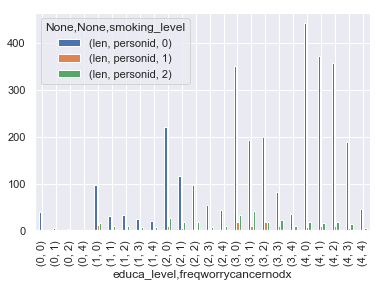

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.pivot_table(dfnew, index=['educa_level', 'freqworrycancernodx'], values=["personid"], columns = ['smoking_level'], aggfunc= [len]).plot(kind='bar')

Data Exploration Plots for analyzing the cancer survey for certain expected and unexpected insights.

In [12]:
T1 = pd.pivot_table(dfnew, index=['smoking_level', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
#T2 = T1.div(T1.iloc[:,-1], axis =0)*100

T1

len
                                  personid
smoking_level freqworrycancernodx         
0             0                       1151
              1                        719
              2                        689
              3                        349
              4                        146
1             0                         45
              1                         27
              2                         31
              3                         17
              4                          9
2             0                         91
              1                         84
              2                         63
              3                         52
              4                         31
Total count                           3504

In [13]:
a = T1.query('freqworrycancernodx == [1,2,3,4] and smoking_level == [0]').sum()
b = T1.query('freqworrycancernodx == [1,2,3,4] and smoking_level == [1,2]').sum()
c = T1.query('smoking_level == [0]').sum()
d = T1.query('smoking_level == [1,2]').sum()
print(a*100/c)
print(b*100/d)

len  personid    62.311722
dtype: float64
len  personid    69.777778
dtype: float64


Frequently worry for non-smokers % = 62.31% and Frequently worry for smokers % = 69.78%.
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
smoking_level is 0 for non smokers and 1,2 for increasing level of smoking.

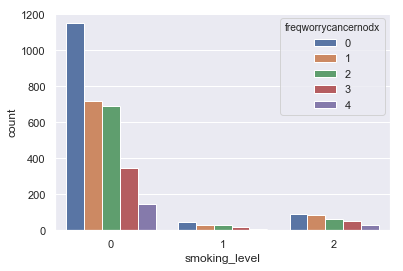

In [14]:
ax1 = sns.countplot(x = 'smoking_level', hue = 'freqworrycancernodx', data = dfnew)

In [15]:
T2 = pd.pivot_table(dfnew, index=['educa_level', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T2

len
                                personid
educa_level freqworrycancernodx         
0           0                         40
            1                          6
            2                          4
            4                          1
1           0                        123
            1                         45
            2                         43
            3                         33
            4                         31
2           0                        257
            1                        139
            2                        117
            3                         65
            4                         53
3           0                        400
            1                        243
            2                        236
            3                        112
            4                         48
4           0                        467
            1                        397
            2                        383
            3                        208
            4                         53
Total count                         3504

In [16]:
a2 = T2.query('freqworrycancernodx == [1,2,3,4] and educa_level == [0]').sum()
b2 = T2.query('freqworrycancernodx == [1,2,3,4] and educa_level == [1]').sum()
c2 = T2.query('freqworrycancernodx == [1,2,3,4] and educa_level == [2]').sum()
d2 = T2.query('freqworrycancernodx == [1,2,3,4] and educa_level == [3]').sum()
e2 = T2.query('freqworrycancernodx == [1,2,3,4] and educa_level == [4]').sum()

f2 = T2.query('educa_level == [0]').sum()
g2 = T2.query('educa_level == [1]').sum()
h2 = T2.query('educa_level == [2]').sum()
i2 = T2.query('educa_level == [3]').sum()
j2 = T2.query('educa_level == [4]').sum()

print(a2*100/f2)
print(b2*100/g2)
print(c2*100/h2)
print(d2*100/i2)
print(e2*100/j2)

len  personid    21.568627
dtype: float64
len  personid    55.272727
dtype: float64
len  personid    59.270998
dtype: float64
len  personid    61.501444
dtype: float64
len  personid    69.03183
dtype: float64


Frequency of worry for cancer % increases with increase of education level : 21% for uneducated, increases from 55.27% to 59.27% to 61.50% to 69.03% with increase in education level.
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
educa_level is 0 for not educated and 1,2,3,4 for increasing level of education.

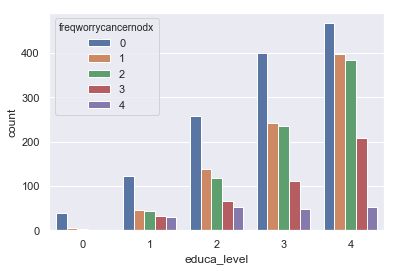

In [17]:
ax2 = sns.countplot(x = 'educa_level', hue = 'freqworrycancernodx', data = dfnew)

In [18]:
T3 = pd.pivot_table(dfnew, index=['selfgender', 'freqworrycancernodx', 'educa_level'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T3_1 = pd.pivot_table(dfnew, index=['selfgender', 'freqworrycancernodx'], values=["personid"], columns = ['educa_level'], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T3_1

len                                  
                                personid                                  
educa_level                            0    1    2     3     4 Total count
selfgender  freqworrycancernodx                                           
0           0                         21   12   28    39    38         138
            1                          2    2   12    13    22          51
            2                          0    4    6    18    26          54
            3                          0    4    8     7    10          29
            4                          0    2    1     3     3           9
1           0                          6   38  101   143   191         479
            1                          0   20   48    84   141         293
            2                          0   16   37    98   165         316
            3                          0    9   20    49    82         160
            4                          0    9   20    16    17          62
2           0                         13   73  128   218   238         670
            1                          4   23   79   146   234         486
            2                          4   23   74   120   192         413
            3                          0   20   37    56   116         229
            4                          1   20   32    29    33         115
Total count                           51  275  631  1039  1508        3504

In [19]:
a3 = T3.query('freqworrycancernodx == [1,2,3,4] and selfgender == [1]').sum()
b3 = T3.query('freqworrycancernodx == [1,2,3,4] and selfgender == [2]').sum()
          
c3 = T3.query('selfgender == [1]').sum()
d3 = T3.query('selfgender == [2]').sum()

print(a3*100/c3)
print(b3*100/d3)

len  personid    63.435115
dtype: float64
len  personid    64.976477
dtype: float64


Frequency of worry for cancer % is more for females (64.98%) than for males (63.43%).
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
selfgender is 1 for males and 2 for females.

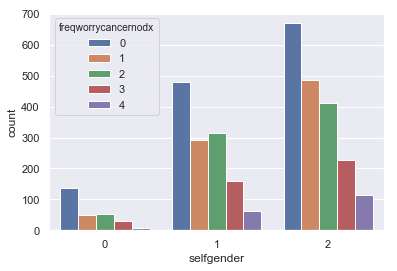

In [20]:
ax3 = sns.countplot(x = 'selfgender', hue = 'freqworrycancernodx', data = dfnew)

In [21]:
T4 = pd.pivot_table(dfnew, index=['selfage', 'freqworrycancernodx', 'educa_level'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')

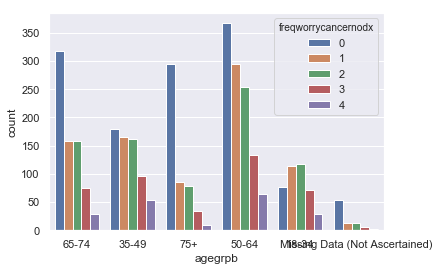

In [22]:
ax4 = sns.countplot(x = 'agegrpb', hue = 'freqworrycancernodx', data = df)

Frequency of worry for decreases with increasing age (highest in the youngest generation surveyed).
Ideally should follow the opposite trend, as the elderly are more susceptible to cancer.
However the younger generation has access to internet, worse lifestyle habits and hence have an increasing worry for getting cancer.

In [23]:
T5 = pd.pivot_table(dfnew, index=['location_level', 'freqworrycancernodx', 'educa_level'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T5

len
                                               personid
location_level freqworrycancernodx educa_level         
1              0                   0                  5
                                   1                  9
                                   2                 18
                                   3                 24
                                   4                 24
               1                   0                  1
                                   1                  3
                                   2                 14
                                   3                  8
                                   4                 11
               2                   1                  4
                                   2                  9
                                   3                 20
                                   4                 10
               3                   1                  3
                                   2                  4
                                   3                 13
                                   4                  7
               4                   1                  1
                                   3                  1
                                   4                  1
2              0                   0                  7
                                   1                 10
                                   2                 32
                                   3                 42
                                   4                 35
               1                   0                  2
                                   1                  4
                                   2                 12
                                   3                 21
...                                                 ...
5              3                   4                 59
               4                   1                  2
                                   2                 10
                                   3                  8
                                   4                 12
6              0                   0                 12
                                   1                 45
                                   2                 78
                                   3                123
                                   4                171
               1                   0                  1
                                   1                 18
                                   2                 44
                                   3                 82
                                   4                168
               2                   0                  3
                                   1                 16
                                   2                 35
                                   3                 84
                                   4                136
               3                   1                 12
                                   2                 18
                                   3                 31
                                   4                 70
               4                   0                  1
                                   1                 20
                                   2                 18
                                   3                 17
                                   4                 21
Total count                                        3504

[134 rows x 1 columns]

In [24]:
a5 = T5.query('freqworrycancernodx == [1,2,3,4] and location_level == [0]').sum()
b5 = T5.query('freqworrycancernodx == [1,2,3,4] and location_level == [1]').sum()
c5 = T5.query('freqworrycancernodx == [1,2,3,4] and location_level == [2]').sum()
d5 = T5.query('freqworrycancernodx == [1,2,3,4] and location_level == [3]').sum()
e5 = T5.query('freqworrycancernodx == [1,2,3,4] and location_level == [4]').sum()
f5 = T5.query('freqworrycancernodx == [1,2,3,4] and location_level == [5]').sum()
g5 = T5.query('freqworrycancernodx == [1,2,3,4] and location_level == [6]').sum()

h5 = T5.query('location_level == [0]').sum()
i5 = T5.query('location_level == [1]').sum()
j5 = T5.query('location_level == [2]').sum()
k5 = T5.query('location_level == [3]').sum()
l5 = T5.query('location_level == [4]').sum()
m5 = T5.query('location_level == [5]').sum()
n5 = T5.query('location_level == [6]').sum()

print(a5*100/h5)
print(b5*100/i5)
print(c5*100/j5)
print(d5*100/k5)
print(e5*100/l5)
print(f5*100/m5)
print(g5*100/n5)

len  personid   NaN
dtype: float64
len  personid    57.894737
dtype: float64
len  personid    57.859532
dtype: float64
len  personid    64.359862
dtype: float64
len  personid    64.471879
dtype: float64
len  personid    62.483829
dtype: float64
len  personid    64.95098
dtype: float64


Frequency of worry for cancer % is more for large metropolitan areas (64.95%) as compared to medium, small and non-metropolitan areas (57.89%).
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
location_level is 0 for non-metropolitan areas and 6 for large metropolitan areas.

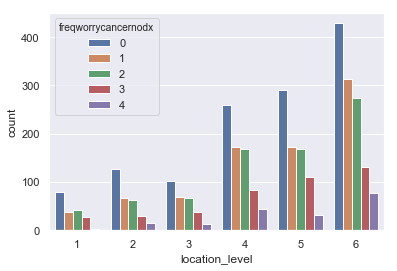

In [25]:
ax5 = sns.countplot(x = 'location_level', hue = 'freqworrycancernodx', data = dfnew)

In [26]:
T6 = pd.pivot_table(dfnew, index=['familyeverhadcancer', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count', dropna = True)
T6

len
                                        personid
familyeverhadcancer freqworrycancernodx         
0                   0                        448
                    1                        221
                    2                        230
                    3                         90
                    4                         52
1                   0                        839
                    1                        609
                    2                        553
                    3                        328
                    4                        134
Total count                                 3504

In [27]:
a6 = T6.query('freqworrycancernodx == [1,2,3,4] and familyeverhadcancer == [0]').sum()
b6 = T6.query('freqworrycancernodx == [1,2,3,4] and familyeverhadcancer == [1]').sum()

c6 = T6.query('familyeverhadcancer == [0]').sum()
d6 = T6.query('familyeverhadcancer == [1]').sum()

print(a6*100/c6)
print(b6*100/d6)

len  personid    56.964457
dtype: float64
len  personid    65.935851
dtype: float64


Frequency of worry for cancer % is more for those with family history of cancer (65.93%) than those without the history (56.96%).
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
familyeverhadcancer is 0 for no family history and 1 for family history of cancer.

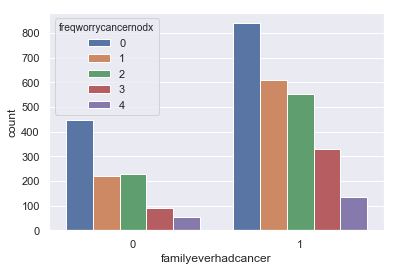

In [29]:
ax5 = sns.countplot(x = 'familyeverhadcancer', hue = 'freqworrycancernodx', data = dfnew)

In [30]:
T6 = pd.pivot_table(dfnew, index=['income_level', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T6

len
                                 personid
income_level freqworrycancernodx         
0            0                         61
             1                         16
             2                         22
             3                          9
             4                          4
1            0                         93
             1                         50
             2                         36
             3                         27
             4                         30
2            0                        104
             1                         36
             2                         31
             3                         17
             4                         14
3            0                         83
             1                         40
             2                         32
             3                         22
             4                         12
4            0                        200
             1                         86
             2                        109
             3                         56
             4                         20
5            0                        155
             1                        104
             2                        105
             3                         47
             4                         25
6            0                        204
             1                        161
             2                        131
             3                         77
             4                         34
7            0                        135
             1                        109
             2                         95
             3                         50
             4                         16
8            0                        184
             1                        165
             2                        169
             3                         81
             4                         25
9            0                         68
             1                         63
             2                         53
             3                         32
             4                          6
Total count                          3504

In [31]:
a6 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [0]').sum()
b6 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [1]').sum()
c6 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [2]').sum()
d6 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [3]').sum()
e6 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [4]').sum()
f6 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [5]').sum()
g6 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [6]').sum()
e6_1 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [7]').sum()
f6_1 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [8]').sum()
g6_1 = T6.query('freqworrycancernodx == [1,2,3,4] and income_level == [9]').sum()

h6 = T6.query('income_level == [0]').sum()
i6 = T6.query('income_level == [1]').sum()
j6 = T6.query('income_level == [2]').sum()
k6 = T6.query('income_level == [3]').sum()
l6 = T6.query('income_level == [4]').sum()
m6 = T6.query('income_level == [5]').sum()
n6 = T6.query('income_level == [6]').sum()
l6_1 = T6.query('income_level == [7]').sum()
m6_1 = T6.query('income_level == [8]').sum()
n6_1 = T6.query('income_level == [9]').sum()

print(a6*100/h6)
print(b6*100/i6)
print(c6*100/j6)
print(d6*100/k6)
print(e6*100/l6)
print(f6*100/m6)
print(g6*100/n6)
print(e6_1*100/l6_1)
print(f6_1*100/m6_1)
print(g6_1*100/n6_1)

len  personid    45.535714
dtype: float64
len  personid    60.59322
dtype: float64
len  personid    48.514851
dtype: float64
len  personid    56.084656
dtype: float64
len  personid    57.537155
dtype: float64
len  personid    64.449541
dtype: float64
len  personid    66.392092
dtype: float64
len  personid    66.666667
dtype: float64
len  personid    70.512821
dtype: float64
len  personid    69.369369
dtype: float64


Frequency of worry for cancer % is more for high income level groups (70.51%) as compared to low income groups (45.53%).
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
income_level is 0 for lowest income groups and 9 for highest income groups.

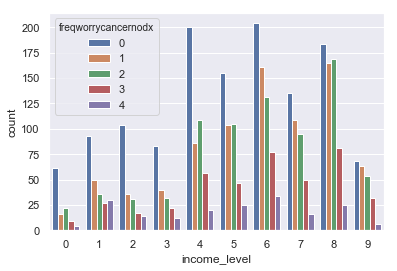

In [32]:
ax6 = sns.countplot(x = 'income_level', hue = 'freqworrycancernodx', data = dfnew)

In [33]:
T7 = pd.pivot_table(dfnew, index=['useinternet', 'educa_level', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T7_1 = pd.pivot_table(dfnew, index=['useinternet', 'freqworrycancernodx'], values=["personid"], columns = ['educa_level'], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')

T7_1

len                                  
                                personid                                  
educa_level                            0    1    2     3     4 Total count
useinternet freqworrycancernodx                                           
0           0                         21   88  112    94    51         366
            1                          3   22   59    42    22         148
            2                          0   23   40    36    25         124
            3                          0   20   17    21    11          69
            4                          1   17   22     9     3          52
1           0                         19   35  145   306   416         921
            1                          3   23   80   201   375         682
            2                          4   20   77   200   358         659
            3                          0   13   48    91   197         349
            4                          0   14   31    39    50         134
Total count                           51  275  631  1039  1508        3504

In [34]:
a7 = T7.query('freqworrycancernodx == [1,2,3,4] and useinternet == [0]').sum()
b7 = T7.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1]').sum()

h7 = T7.query('useinternet == [0]').sum()
i7 = T7.query('useinternet == [1]').sum()


print(a7*100/h7)
print(b7*100/i7)

len  personid    51.778656
dtype: float64
len  personid    66.448087
dtype: float64


In [35]:
a7_1 = T7.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and educa_level == [0]').sum()
b7_1 = T7.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and educa_level == [1]').sum()
c7_1 = T7.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and educa_level == [2]').sum()
d7_1 = T7.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and educa_level == [3]').sum()
e7_1 = T7.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and educa_level == [4]').sum()

h7_1 = T7.query('useinternet == [1] and educa_level == [0]').sum()
i7_1 = T7.query('useinternet == [1] and educa_level == [1]').sum()
j7_1 = T7.query('useinternet == [1] and educa_level == [2]').sum()
k7_1 = T7.query('useinternet == [1] and educa_level == [3]').sum()
l7_1 = T7.query('useinternet == [1] and educa_level == [4]').sum()

print(a7_1*100/h7_1)
print(b7_1*100/i7_1)
print(c7_1*100/j7_1)
print(d7_1*100/k7_1)
print(e7_1*100/l7_1)

len  personid    26.923077
dtype: float64
len  personid    66.666667
dtype: float64
len  personid    61.942257
dtype: float64
len  personid    63.44086
dtype: float64
len  personid    70.200573
dtype: float64


Frequency of worry for cancer % is more for groups with access to internet (66.45%) as compared to those without internet access (51.78%).
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
useinternet is 0 for no internet access and 1 for access to internet available.

Moreover, in the above pivot table, it can be seen that with internet access, if education level increases (from 26.92% for uneducated to 70.20% for highly educated), the frequency of worry for cancer also increases.

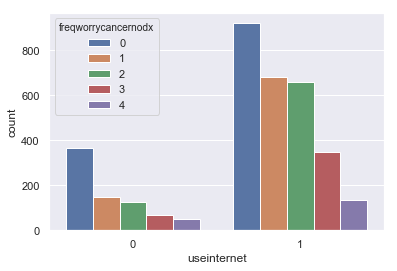

In [36]:
ax7 = sns.countplot(x = 'useinternet', hue = 'freqworrycancernodx', data = dfnew)

In [37]:
T8 = pd.pivot_table(dfnew, index=['useinternet', 'smoking_level', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T8_1 = pd.pivot_table(dfnew, index=['useinternet', 'freqworrycancernodx'], values=["personid"],columns = ['smoking_level'],  aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T8_1

len                      
                                personid                      
smoking_level                          0    1    2 Total count
useinternet freqworrycancernodx                               
0           0                        320   16   30         366
            1                        122    6   20         148
            2                        101    6   17         124
            3                         59    3    7          69
            4                         40    3    9          52
1           0                        831   29   61         921
            1                        597   21   64         682
            2                        588   25   46         659
            3                        290   14   45         349
            4                        106    6   22         134
Total count                         3054  129  321        3504

In [38]:
a8 = T8.query('freqworrycancernodx == [1,2,3,4] and useinternet == [0] and smoking_level == [1,2]').sum()
b8 = T8.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and smoking_level == [1,2]').sum()
c8 = T8.query('freqworrycancernodx == [1,2,3,4] and useinternet == [0] and smoking_level == [0]').sum()
d8 = T8.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and smoking_level == [0]').sum()

h8 = T8.query('useinternet == [0] and smoking_level == [1,2]').sum() 
i8 = T8.query('useinternet == [1] and smoking_level == [1,2]').sum()
k8 = T8.query('useinternet == [0] and smoking_level == [0]').sum()
l8 = T8.query('useinternet == [1] and smoking_level == [0]').sum()

# smokers
print(a8*100/h8*0.75) 
print(b8*100/i8*0.75)

#non smokers
print(c8*100/k8) 
print(d8*100/l8)


len  personid    45.512821
dtype: float64
len  personid    54.72973
dtype: float64
len  personid    50.155763
dtype: float64
len  personid    65.547264
dtype: float64


*The below is the summary for the PLOT1 for the data incubator challenge 3.

Frequency of worry for cancer % for smokers and non-smokers varies with respect to the internet access.
The non-smokers with internet access have 15% more worry (difference) than non-smokers without internet access.
While, the smokers with interne access have 9% more worry (difference) than smokers without internet access.
This shows that the internet usage is catering to the non-smokers group more effectively than the smokers group and hence causing unneccessary scare for the lessere prone group of subjects.

freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
smoking_level is 0 for non-smokers and 1,2 for smokers.

In [39]:
#ax8 = sns.countplot(x = 'income_level', hue = 'freqworrycancernodx', data = dfnew)

In [40]:
dfnew['occupationstatus'] = df ['occupationstatus']
T9 = pd.pivot_table(dfnew, index=['useinternet', 'occupationstatus', 'selfgender', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T9_1 = pd.pivot_table(dfnew, index=['useinternet','selfgender', 'freqworrycancernodx'], values=["personid"],columns = ['occupationstatus'],  aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T9_1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


len                     \
                                           personid                      
occupationstatus                           Disabled Employed Homemaker   
useinternet selfgender freqworrycancernodx                               
0           0          0                          8        9         2   
                       1                          2        4         2   
                       2                          3        5         0   
                       3                          1        3         0   
                       4                          1        0         1   
            1          0                          7       36         0   
                       1                          4       11         0   
                       2                          4       17         1   
                       3                          2       12         0   
                       4                          7        5         0   
            2          0                         31       22        20   
                       1                          9       15        14   
                       2                          6       11         8   
                       3                          9        7         2   
                       4                          8        8         2   
1           0          0                          4       21         1   
                       1                          1       20         2   
                       2                          2       22         0   
                       3                          2        9         1   
                       4                          0        2         0   
            1          0                         21      153         1   
                       1                          4      159         1   
                       2                          6      170         1   
                       3                          8       91         3   
                       4                          4       23         2   
            2          0                         26      241        34   
                       1                         23      244        25   
                       2                         13      214        16   
                       3                          8      111        15   
                       4                          9       51         7   
Total count                                     233     1696       161   

                                                                           \
                                                                            
occupationstatus                           Missing data (Not Ascertained)   
useinternet selfgender freqworrycancernodx                                  
0           0          0                                                9   
                       1                                                1   
                       2                                                0   
                       3                                                0   
                       4                                                0   
            1          0                                                3   
                       1                                                0   
                       2                                                0   
                       3                                                0   
                       4                                                0   
            2          0                                                7   
                       1                                                0   
                       2                                                0   
                       3                                                0   
                       4                                               

In [41]:
a9 = T9.query('freqworrycancernodx == [1,2,3,4] and useinternet == [0] and selfgender == [2] and occupationstatus == ["Unemployed"]').sum()
b9 = T9.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and selfgender == [2] and occupationstatus == ["Unemployed"]').sum()
a9_1 = T9.query('freqworrycancernodx == [1,2,3,4] and useinternet == [0] and selfgender == [2] and occupationstatus == ["Student"]').sum()
b9_1 = T9.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and selfgender == [2] and occupationstatus == ["Student"]').sum()

h9 = T9.query('useinternet == [0] and selfgender == [2] and occupationstatus == ["Unemployed"]').sum()
i9 = T9.query('useinternet == [1] and selfgender == [2] and occupationstatus == ["Unemployed"]').sum()
j9 = T9.query('useinternet == [0] and selfgender == [2] and occupationstatus == ["Student"]').sum()
k9 = T9.query('useinternet == [1] and selfgender == [2] and occupationstatus == ["Student"]').sum()

print(a9*100/h9)
print(b9*100/i9)
print(a9_1*100/j9)
print(b9_1*100/k9)

len  personid    42.857143
dtype: float64
len  personid    64.583333
dtype: float64
len  personid    50.0
dtype: float64
len  personid    83.783784
dtype: float64


*The below is the summary for the PLOT2 for the data incubator challenge 3.

Frequency of worry for cancer % for females who are unemployed/students varies drastically depending on whether they have access to internet.
For unemployed females, with use of internet, frequency of worry for cancer % increases from 42.85% to 64.58% (hike of 22%) with internet access. Also, for female students, the jump is from 50% to 83.78% (33% difference).

This indicates that accessing internet for seeking healthcare information in turn increases worry for getting cancer in females. The data is to be analyzed further to see if similar trends are being observed for other subsets of data as well. And hence Health IT adverse affects on the lesser prone audience can be analysed and estimated to understand its impact.
Accordingly, mitigation steps to ensure this impact is reduced as well as steps to ensure Health IT caters to the right audience more effectively can be recommended.

freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
useinternet is 0 for no internet access and 1 for internet access.

In [42]:
#ax8 = sns.countplot(x = 'income_level', hue = 'freqworrycancernodx', data = dfnew)

In [43]:
T8 = pd.pivot_table(dfnew, index=['useinternet', 'smoking_level', 'freqworrycancernodx'], values=["personid"], aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T8_1 = pd.pivot_table(dfnew, index=['useinternet', 'freqworrycancernodx'], values=["personid"],columns = ['smoking_level'],  aggfunc= [len], fill_value =0, margins = True, margins_name = 'Total count')
T8_1

len                      
                                personid                      
smoking_level                          0    1    2 Total count
useinternet freqworrycancernodx                               
0           0                        320   16   30         366
            1                        122    6   20         148
            2                        101    6   17         124
            3                         59    3    7          69
            4                         40    3    9          52
1           0                        831   29   61         921
            1                        597   21   64         682
            2                        588   25   46         659
            3                        290   14   45         349
            4                        106    6   22         134
Total count                         3054  129  321        3504

In [44]:
a8 = T8.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and smoking_level == [0]').sum()
b8 = T8.query('freqworrycancernodx == [1,2,3,4] and useinternet == [1] and smoking_level == [1]').sum()

h8 = T8.query('useinternet == [1] and smoking_level == [0]').sum()
i8 = T8.query('useinternet == [1] and smoking_level == [1]').sum()

print(a8*100/h8)
print(b8*100/i8)

len  personid    65.547264
dtype: float64
len  personid    69.473684
dtype: float64


Frequency of worry for cancer % is more for high income level groups (70.51%) as compared to low income groups (45.53%).
freqworrycancernodx is 0 for no worry and 1,2,3,4 for increasing worry.
income_level is 0 for lowest income groups and 9 for highest income groups.

In [45]:
#ax8 = sns.countplot(x = 'income_level', hue = 'freqworrycancernodx', data = dfnew)

Similar study is recommended for the audience with a self/family history of cancer to see if the impact of internet usage, health IT and other demographic factors is greater as expected or otherwise.

Another interesting aspect is to measure the difference in frequency of worrying of smokers and those using e-ciggaretes (assuming other variables stay the same) in order to understand how the transition of e-ciggaretes from the usual ciggaretes impact the fear quotient in the cancer-prone and non-cancer-prone audiences.

Grouped observations for absolute values from the survey data.

In [46]:
#df.groupby(['freqworrycancernodx', 'qdisp']).size()
idv = ['selfgender', 'selfage', 'income_level', 'educa_level', 'location_level', 'useinternet', 'smoking_level',
      'eciguse_level', 'everhadcancer', 'familyeverhadcancer', 'drinksperday', 'electronic_selfhealthinfo']

In [47]:
df.groupby(['freqworrycancernodx', 'educa_level']).size()

freqworrycancernodx  educa_level
0                    0               40
                     1              123
                     2              257
                     3              400
                     4              467
1                    0                6
                     1               45
                     2              139
                     3              243
                     4              397
2                    0                4
                     1               43
                     2              117
                     3              236
                     4              383
3                    1               33
                     2               65
                     3              112
                     4              208
4                    0                1
                     1               31
                     2               53
                     3               48
                     4               53
dtype: 

In [48]:
df.groupby(['freqworrycancernodx', 'income_level']).size()

freqworrycancernodx  income_level
0                    0                61
                     1                93
                     2               104
                     3                83
                     4               200
                     5               155
                     6               204
                     7               135
                     8               184
                     9                68
1                    0                16
                     1                50
                     2                36
                     3                40
                     4                86
                     5               104
                     6               161
                     7               109
                     8               165
                     9                63
2                    0                22
                     1                36
                     2                31
                     3 

In [49]:
df.groupby(['freqworrycancernodx', 'income_level']).size()

freqworrycancernodx  income_level
0                    0                61
                     1                93
                     2               104
                     3                83
                     4               200
                     5               155
                     6               204
                     7               135
                     8               184
                     9                68
1                    0                16
                     1                50
                     2                36
                     3                40
                     4                86
                     5               104
                     6               161
                     7               109
                     8               165
                     9                63
2                    0                22
                     1                36
                     2                31
                     3 

In [50]:
df.groupby(['freqworrycancernodx', 'income_level']).size()

freqworrycancernodx  income_level
0                    0                61
                     1                93
                     2               104
                     3                83
                     4               200
                     5               155
                     6               204
                     7               135
                     8               184
                     9                68
1                    0                16
                     1                50
                     2                36
                     3                40
                     4                86
                     5               104
                     6               161
                     7               109
                     8               165
                     9                63
2                    0                22
                     1                36
                     2                31
                     3 

In [51]:
df.groupby(['freqworrycancernodx', 'income_level']).size()

freqworrycancernodx  income_level
0                    0                61
                     1                93
                     2               104
                     3                83
                     4               200
                     5               155
                     6               204
                     7               135
                     8               184
                     9                68
1                    0                16
                     1                50
                     2                36
                     3                40
                     4                86
                     5               104
                     6               161
                     7               109
                     8               165
                     9                63
2                    0                22
                     1                36
                     2                31
                     3 

In [52]:
df.groupby(['freqworrycancernodx', 'income_level']).size()

freqworrycancernodx  income_level
0                    0                61
                     1                93
                     2               104
                     3                83
                     4               200
                     5               155
                     6               204
                     7               135
                     8               184
                     9                68
1                    0                16
                     1                50
                     2                36
                     3                40
                     4                86
                     5               104
                     6               161
                     7               109
                     8               165
                     9                63
2                    0                22
                     1                36
                     2                31
                     3 

In [53]:
df.groupby(['freqworrycancernodx', 'income_level']).size()

freqworrycancernodx  income_level
0                    0                61
                     1                93
                     2               104
                     3                83
                     4               200
                     5               155
                     6               204
                     7               135
                     8               184
                     9                68
1                    0                16
                     1                50
                     2                36
                     3                40
                     4                86
                     5               104
                     6               161
                     7               109
                     8               165
                     9                63
2                    0                22
                     1                36
                     2                31
                     3 

In [54]:
df.groupby(['freqworrycancernodx', 'income_level']).size()

freqworrycancernodx  income_level
0                    0                61
                     1                93
                     2               104
                     3                83
                     4               200
                     5               155
                     6               204
                     7               135
                     8               184
                     9                68
1                    0                16
                     1                50
                     2                36
                     3                40
                     4                86
                     5               104
                     6               161
                     7               109
                     8               165
                     9                63
2                    0                22
                     1                36
                     2                31
                     3 

In [55]:
df.educa.value_counts()

College Graduate or More          1508
Some College                      1039
High School Graduate               631
Less than High School              275
Missing Data (Not Ascertained)      51
Name: educa, dtype: int64

In [56]:
df.groupby(['freqworrycancernodx', 'hhinc']).size()

freqworrycancernodx  hhinc                         
0                    $20,000 to < $35,000              179
                     $35,000 to < $50,000              139
                     $50,000 to < $75,000              189
                     $75,000 or More                   324
                     Less than $20,000                 255
                     Missing Data (Not Ascertained)    201
1                    $20,000 to < $35,000               80
                     $35,000 to < $50,000               98
                     $50,000 to < $75,000              153
                     $75,000 or More                   309
                     Less than $20,000                 116
                     Missing Data (Not Ascertained)     74
2                    $20,000 to < $35,000              102
                     $35,000 to < $50,000               98
                     $50,000 to < $75,000              120
                     $75,000 or More                   286
    

In [57]:
df.groupby(['freqworrycancernodx', 'smokestat']).size()

freqworrycancernodx  smokestat                                          
0                    Current                                                136
                     Former                                                 346
                     Missing Data (Filter Missing), coded -9 in Smoke100     22
                     Missing Data (Not Ascertained)                           9
                     Never                                                  774
1                    Current                                                111
                     Former                                                 209
                     Missing Data (Filter Missing), coded -9 in Smoke100      9
                     Missing Data (Not Ascertained)                           3
                     Never                                                  498
2                    Current                                                 94
                     Former                    

In [58]:
df.groupby(['smokestat', 'freqworrycancernodx']).size()

smokestat                                            freqworrycancernodx
Current                                              0                      136
                                                     1                      111
                                                     2                       94
                                                     3                       69
                                                     4                       40
Former                                               0                      346
                                                     1                      209
                                                     2                      190
                                                     3                       96
                                                     4                       26
Missing Data (Filter Missing), coded -9 in Smoke100  0                       22
                                               

In [59]:
df.groupby(['freqworrycancernodx', 'eciguse']).size()

freqworrycancernodx  eciguse                                                
0                    Current                                                      23
                     Former                                                       90
                     Missing Data (Filter Missing), coded -9 in UsedECigEver      27
                     Never                                                      1147
1                    Current                                                      31
                     Former                                                       96
                     Missing Data (Filter Missing), coded -9 in UsedECigEver      10
                     Never                                                       693
2                    Current                                                      14
                     Former                                                       69
                     Missing Data (Filter Missing), coded -9 in UsedECigE

In [60]:
df.groupby(['freqworrycancernodx', 'incomeranges_imp']).size()

freqworrycancernodx  incomeranges_imp    
0                    $0 to $9,999             93
                     $10,000 to $14,999      104
                     $100,000 to $199,999    184
                     $15,000 to $19,999       83
                     $20,000 to $34,999      200
                     $200,000 or more         68
                     $35,000 to $49,999      155
                     $50,000 to $74,999      204
                     $75,000 to $99,999      135
                     Missing Data             61
1                    $0 to $9,999             50
                     $10,000 to $14,999       36
                     $100,000 to $199,999    165
                     $15,000 to $19,999       40
                     $20,000 to $34,999       86
                     $200,000 or more         63
                     $35,000 to $49,999      104
                     $50,000 to $74,999      161
                     $75,000 to $99,999      109
                     Missin

In [61]:
df.groupby(['incomeranges_imp', 'freqworrycancernodx']).size()

incomeranges_imp      freqworrycancernodx
$0 to $9,999          0                       93
                      1                       50
                      2                       36
                      3                       27
                      4                       30
$10,000 to $14,999    0                      104
                      1                       36
                      2                       31
                      3                       17
                      4                       14
$100,000 to $199,999  0                      184
                      1                      165
                      2                      169
                      3                       81
                      4                       25
$15,000 to $19,999    0                       83
                      1                       40
                      2                       32
                      3                       22
                      4    

In [62]:
#idcols2_spl = ['agegrpb', 'educa', 'hhinc','bmi', 'smokestat', 'phq4', 'weeklyminutesmoderateexercise','eciguse', 'avgdrinksperweek', 'incomeranges_imp']

In [63]:
df.groupby(['seekhealthinfo', 'freqworrycancernodx']).size()

seekhealthinfo  freqworrycancernodx
Missing data    0                        5
                1                        3
                3                        2
No              0                      342
                1                      138
                2                      125
                3                       56
                4                       47
Yes             0                      940
                1                      689
                2                      658
                3                      360
                4                      139
dtype: int64

In [ ]:
df.groupby(['genderc', 'freqworrycancernodx']).size()

In [ ]:
df.groupby(['maritalstatus', 'freqworrycancernodx']).size()

In [ ]:
df.groupby(['familyeverhadcancer', 'freqworrycancernodx']).size()

In [ ]:
df.groupby(['healthinsurance', 'freqworrycancernodx']).size()

In [ ]:
df.groupby(['occupationstatus', 'freqworrycancernodx']).size()

In [65]:
df.groupby(['caregivingwho_cat', 'freqworrycancernodx']).size()

caregivingwho_cat                           freqworrycancernodx
Missing data (Not Ascertained)              0                        59
                                            1                        17
                                            2                        13
                                            3                         7
                                            4                         6
Multiple caregiving relationships selected  0                        16
                                            1                        15
                                            2                         8
                                            3                         6
                                            4                         2
No                                          0                      1067
                                            1                       677
                                            2                       674


In [66]:
df.groupby(['caregiving_cancer', 'freqworrycancernodx']).size()

caregiving_cancer                              freqworrycancernodx
Inapplicable, coded 1 Caregiving_No            0                      1059
                                               1                       675
                                               2                       674
                                               3                       346
                                               4                       152
Missing Data (Not Ascertained)                 0                         4
                                               2                         3
                                               3                         2
Missing data (Filter Missing)                  0                        50
                                               1                        13
                                               2                        13
                                               3                         4
                                 

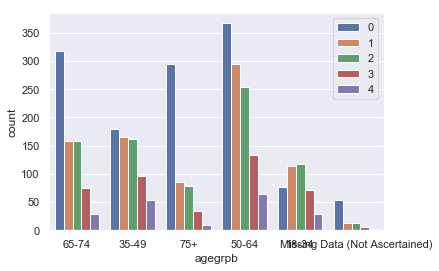

In [67]:
#idcols2_spl = ['agegrpb', 'educa', 'hhinc','bmi', 'smokestat', 'phq4', 'weeklyminutesmoderateexercise',
#'eciguse', 'avgdrinksperweek', 'incomeranges_imp']
ax = sns.countplot(x = 'agegrpb', hue = 'freqworrycancernodx', data = df)
plt.legend(loc = "best")
#order = reversed(df['agegrpb'].value_counts().index)

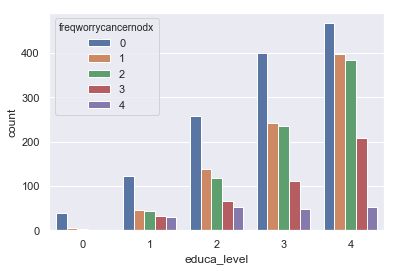

In [68]:
ax = sns.countplot(x = 'educa_level', hue = 'freqworrycancernodx', data = df)

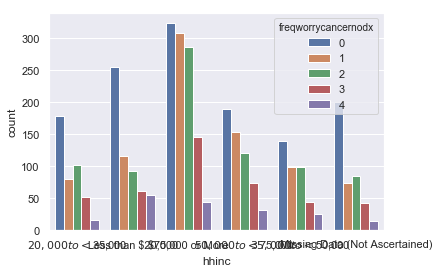

In [69]:
ax = sns.countplot(x = 'hhinc', hue = 'freqworrycancernodx', data = df)

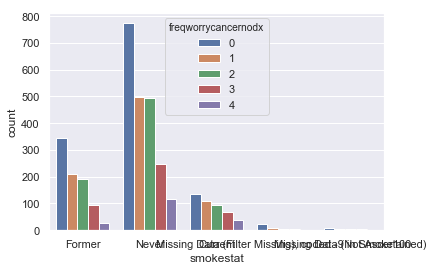

In [70]:
ax = sns.countplot(x = 'smokestat', hue = 'freqworrycancernodx', data = df)

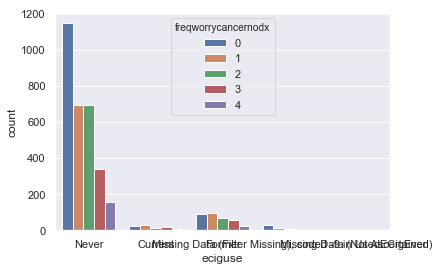

In [71]:
ax = sns.countplot(x = 'eciguse', hue = 'freqworrycancernodx', data = df)

In [72]:
#idcols2_spl = ['agegrpb', 'educa', 'hhinc','bmi', 'smokestat', 'phq4', 'weeklyminutesmoderateexercise','eciguse', 'avgdrinksperweek', 'incomeranges_imp']

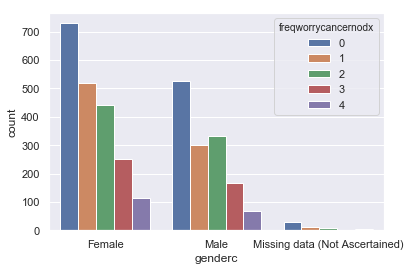

In [73]:
ax = sns.countplot(x = 'genderc', hue = 'freqworrycancernodx', data = df)

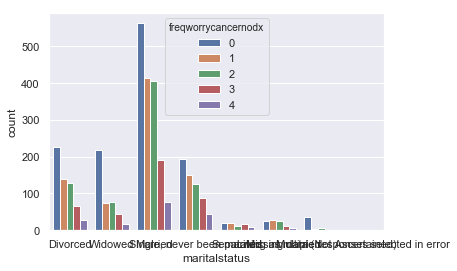

In [74]:
ax = sns.countplot(x = 'maritalstatus', hue = 'freqworrycancernodx', data = df)

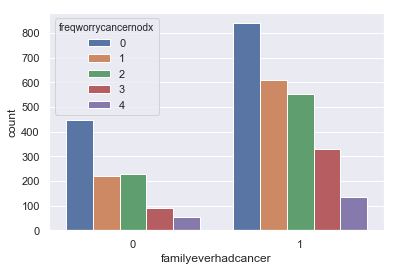

In [75]:
ax = sns.countplot(x = 'familyeverhadcancer', hue = 'freqworrycancernodx', data = df)

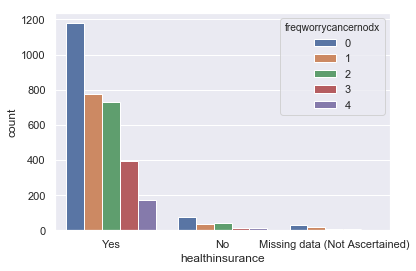

In [76]:
ax = sns.countplot(x = 'healthinsurance', hue = 'freqworrycancernodx', data = df)

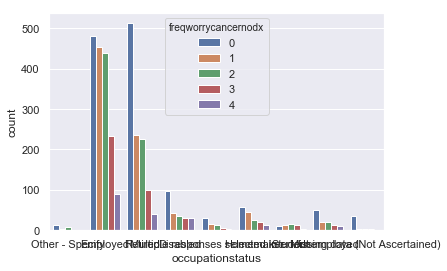

In [77]:
ax = sns.countplot(x = 'occupationstatus', hue = 'freqworrycancernodx', data = df)

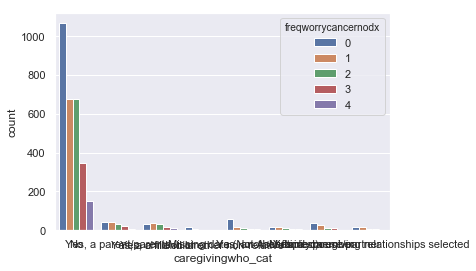

In [78]:
ax = sns.countplot(x = 'caregivingwho_cat', hue = 'freqworrycancernodx', data = df)

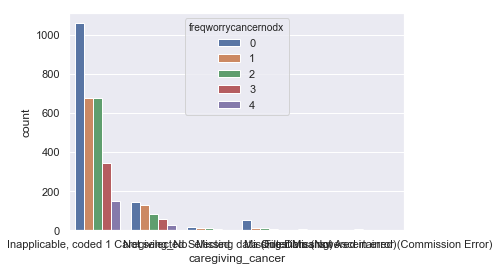

In [79]:
ax = sns.countplot(x = 'caregiving_cancer', hue = 'freqworrycancernodx', data = df)

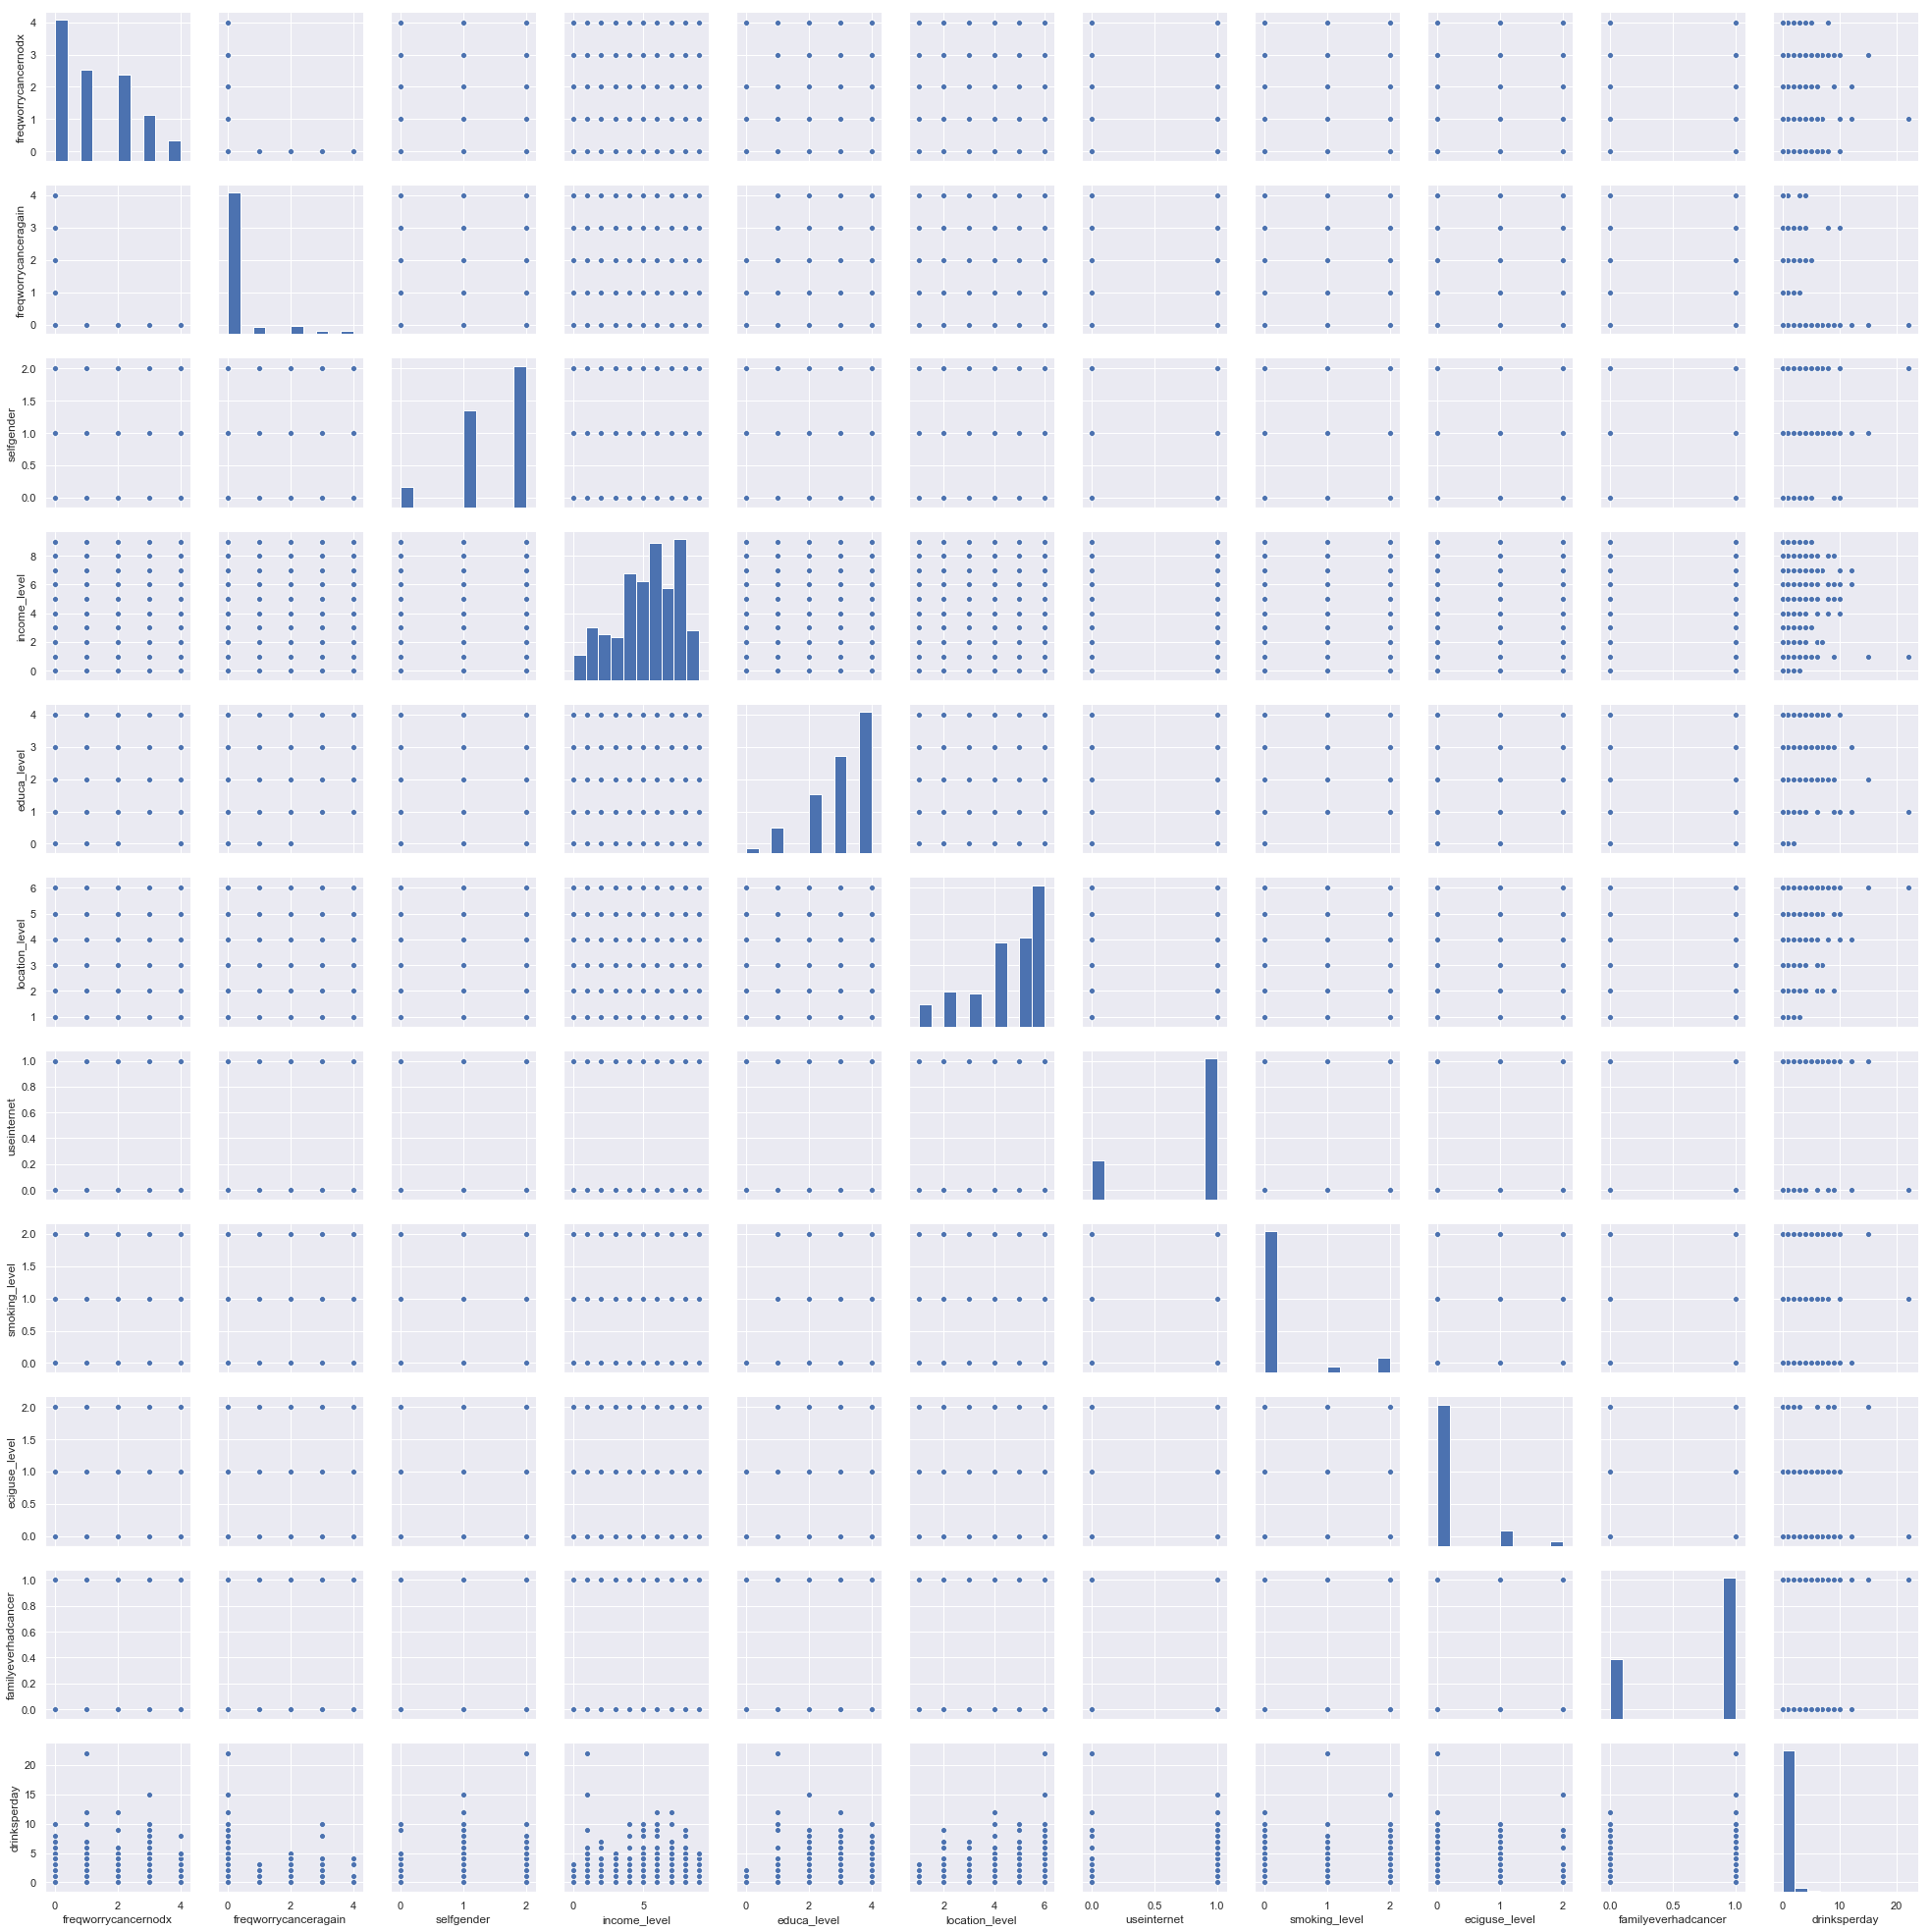

In [80]:
# library & dataset
import seaborn as sns
#df = sns.load_dataset('iris')
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(dfnew[cols])